In [1]:
# Math and Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Preprocesssing Libraries
from sklearn.model_selection import train_test_split
import datetime as dt

In [3]:
# ML Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost

In [4]:
# Libraries to analyze the Model 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('Walmart DataSet.csv')

# Dataset

In [7]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [8]:
# Extracting datetime features
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5


In [9]:
data.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.447552,15.678322
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,1.000000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,8.000000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,16.000000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,23.000000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,31.000000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.238308,8.755780


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int32         
 9   Month         6435 non-null   int32         
 10  Day           6435 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(3), int64(2)
memory usage: 477.7 KB


In [11]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Day             0
dtype: int64

# EDA

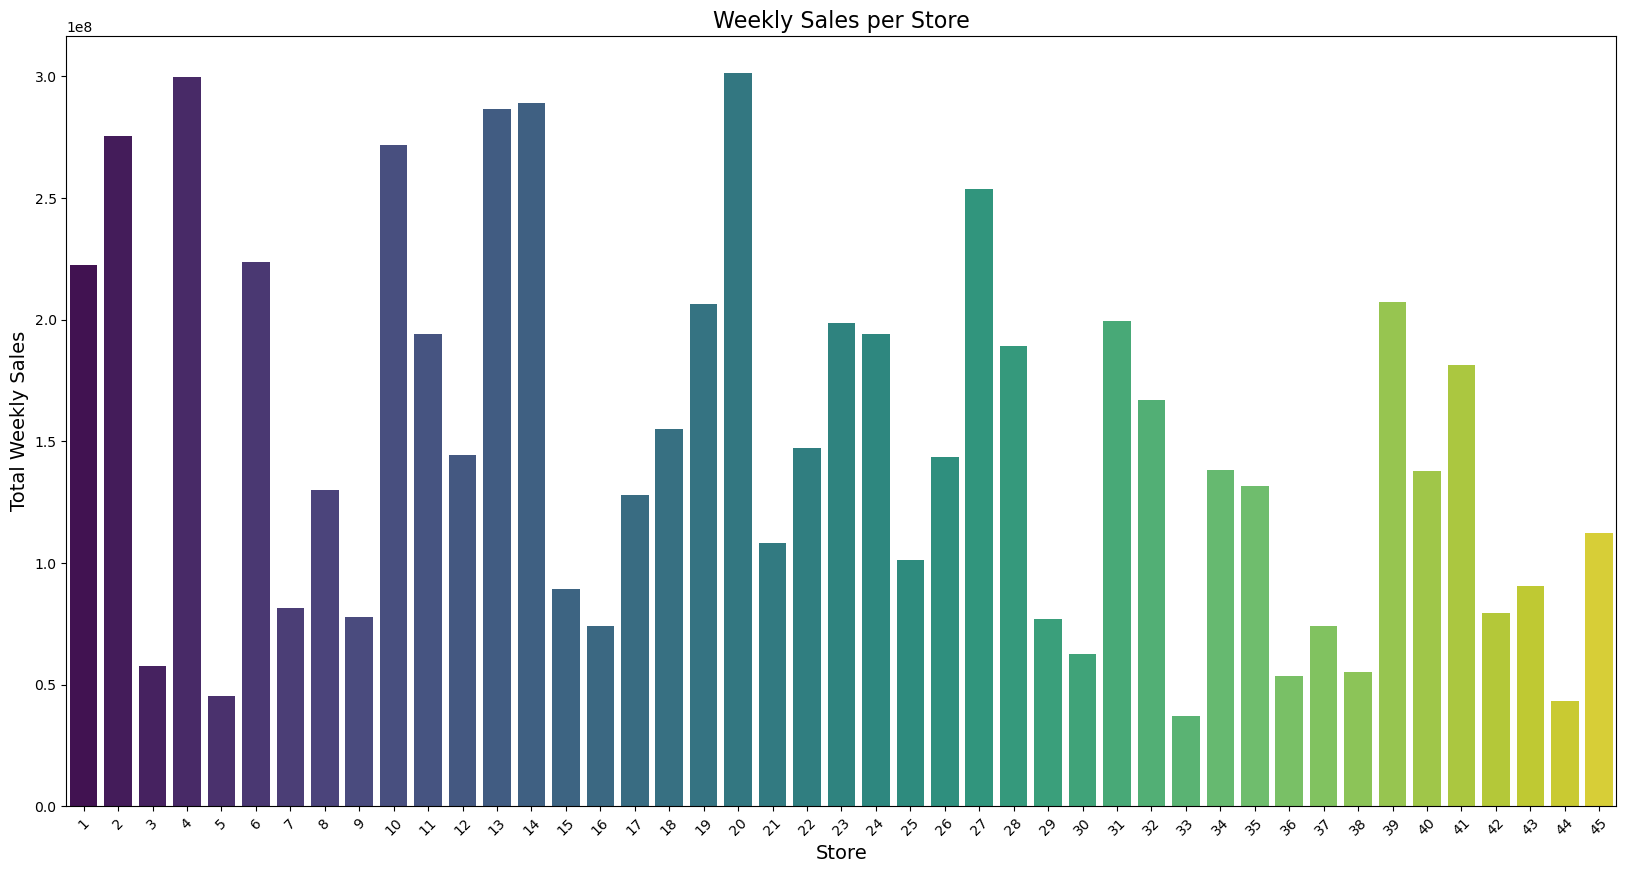

In [12]:
# Weekly sales per store 
weekly_sales_per_store = data.groupby('Store')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(20, 10))
sns.barplot(x='Store', y='Weekly_Sales', data=weekly_sales_per_store, palette='viridis')

plt.title('Weekly Sales per Store', fontsize=16)
plt.xlabel('Store', fontsize=14)
plt.ylabel('Total Weekly Sales', fontsize=14)
plt.xticks(rotation=45)
plt.show()

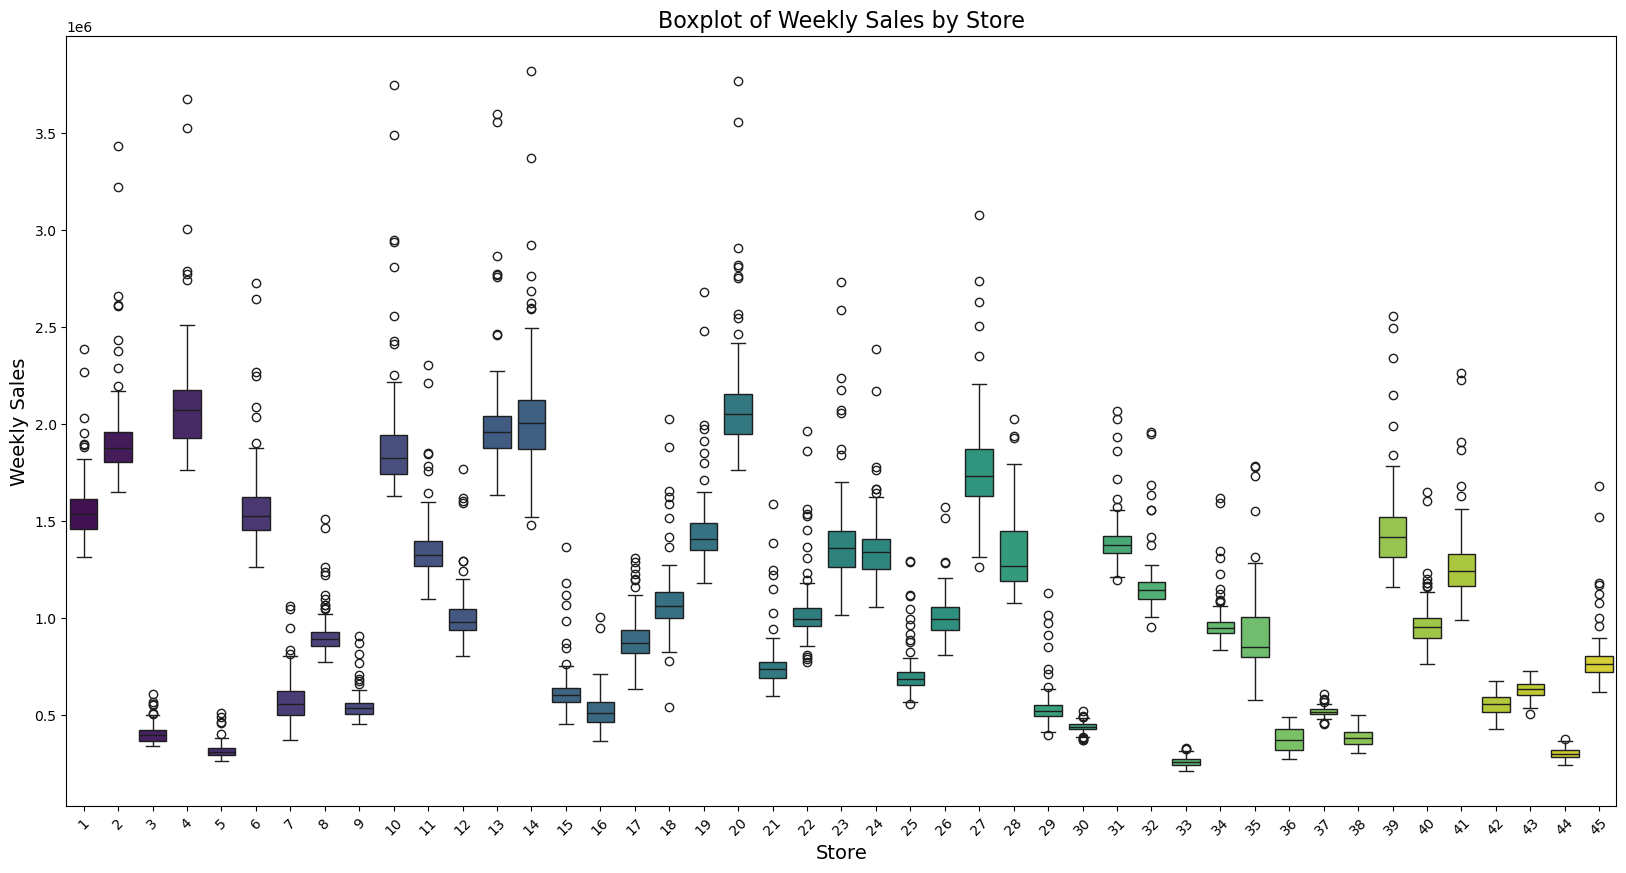

In [13]:
# Boxplot for 'Weekly_Sales' by 'Store'
plt.figure(figsize=(20, 10))
sns.boxplot(x='Store', y='Weekly_Sales', data=data, palette='viridis')

plt.title('Boxplot of Weekly Sales by Store', fontsize=16)
plt.xlabel('Store', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.xticks(rotation=45)
plt.show()

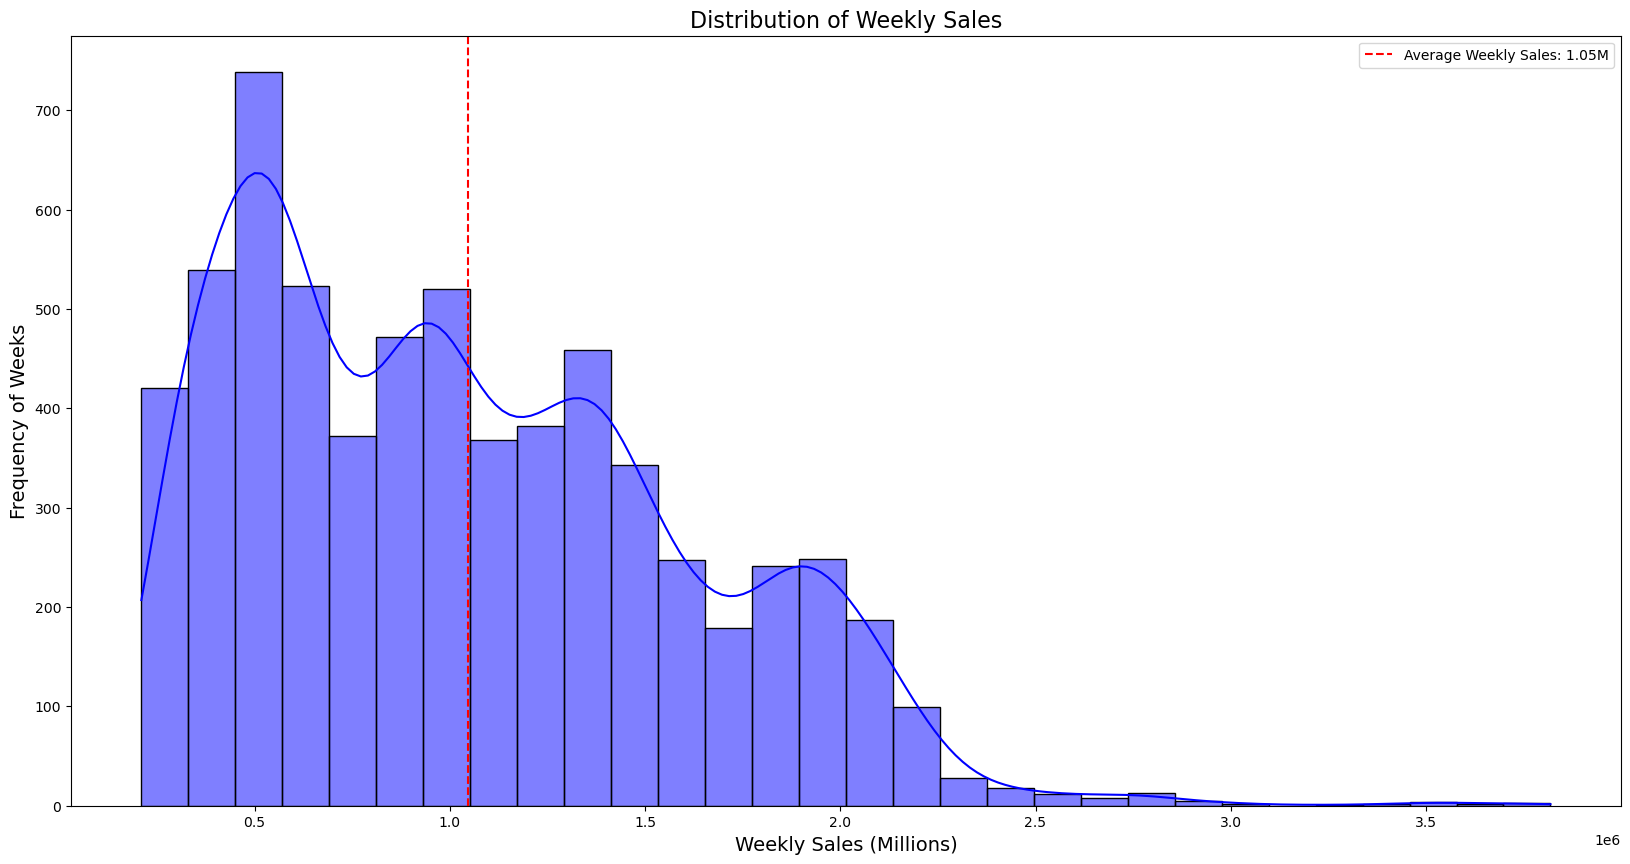

In [14]:
# Weekly sales - Cummulative of all stores

# The average weekly sales
average_sales = data['Weekly_Sales'].mean()


plt.figure(figsize=(20, 10))
sns.histplot(data.Weekly_Sales, bins=30, kde=True, color='blue')

plt.title('Distribution of Weekly Sales', fontsize=16)
plt.axvline(average_sales, color='red', linestyle='--', label='Average Weekly Sales: {:.2f}M'.format(average_sales / 1e6))
plt.xlabel('Weekly Sales (Millions)', fontsize=14)
plt.ylabel('Frequency of Weeks', fontsize=14)
plt.legend(loc='upper right')
plt.show()

Based on the plot above, the average store sales are approximately $1.1 million, with individual figures ranging between $0.25 million and $2.2 million.

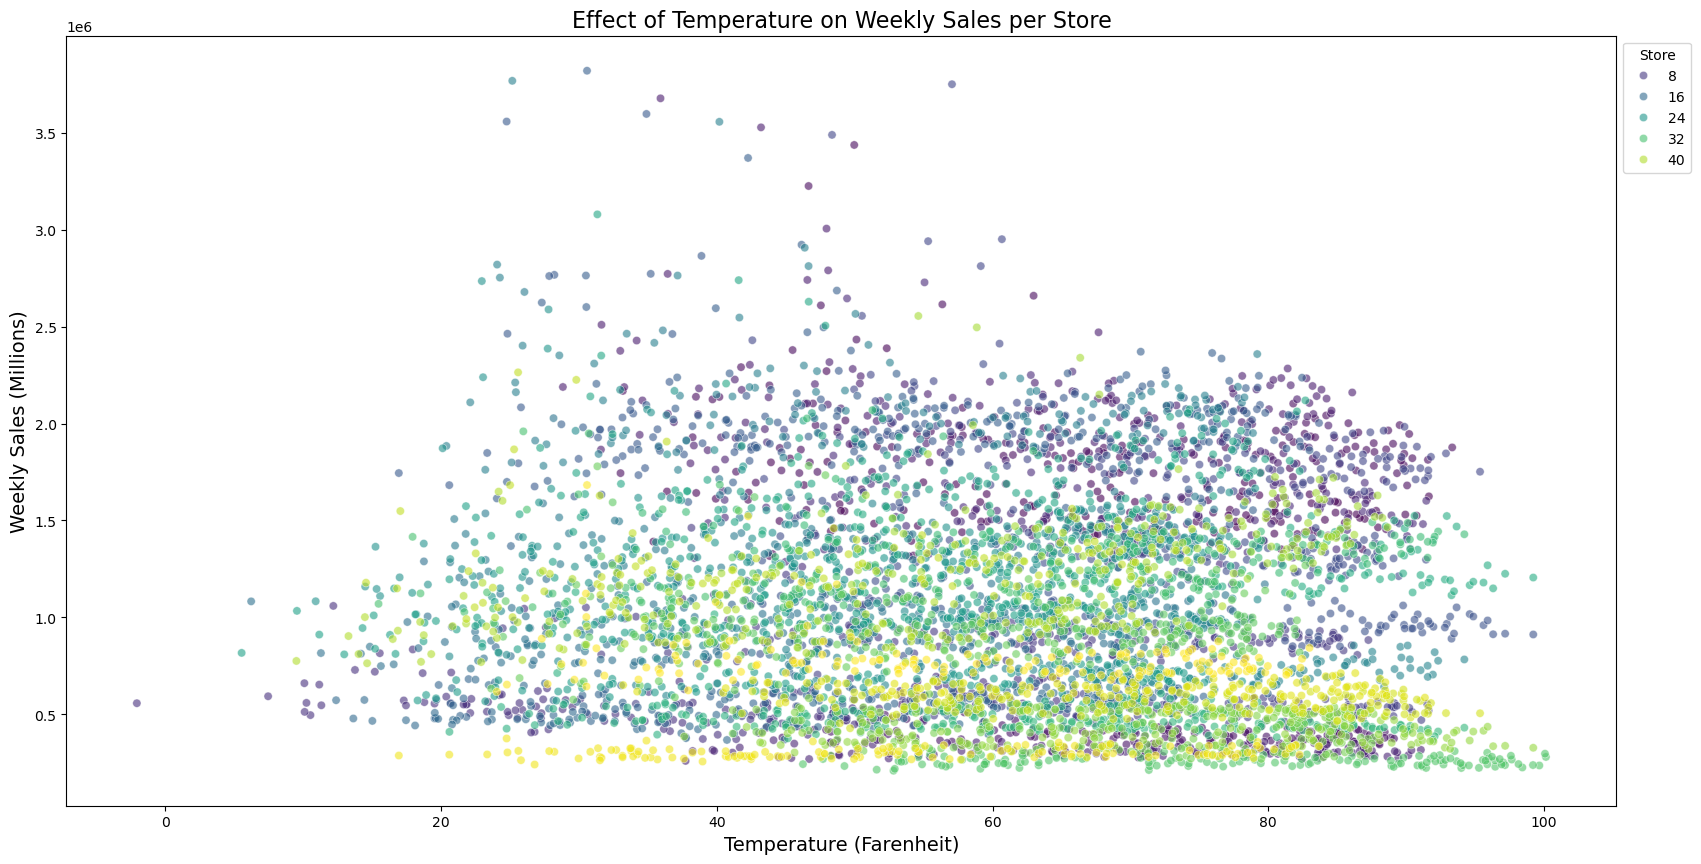

In [15]:
# Effect of Temperature on Weekly Sales per Store
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data, hue='Store', palette='viridis', alpha=0.6)

plt.title('Effect of Temperature on Weekly Sales per Store', fontsize=16)
plt.xlabel('Temperature (Farenheit)', fontsize=14)
plt.ylabel('Weekly Sales (Millions)', fontsize=14)
plt.legend(title='Store', bbox_to_anchor=(1,1), loc='upper left')
plt.show()

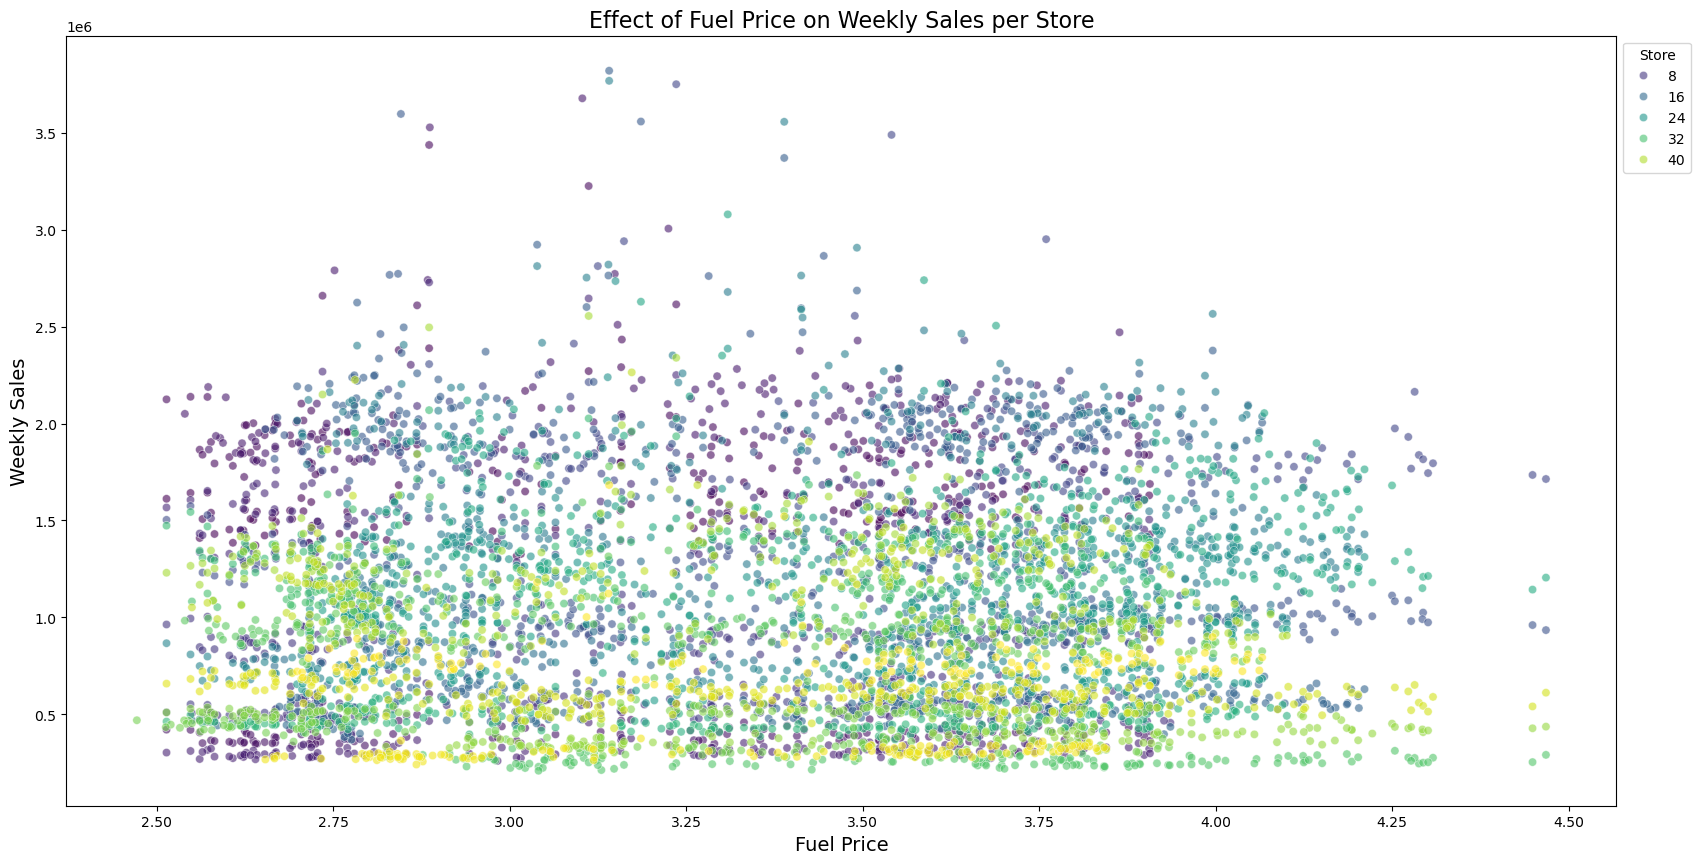

In [16]:
# Effect of Fuel price on Weekly Sales per Store
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=data, hue='Store', palette='viridis', alpha=0.6)

plt.title('Effect of Fuel Price on Weekly Sales per Store', fontsize=16)
plt.xlabel('Fuel Price', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.legend(title='Store', bbox_to_anchor=(1,1), loc='upper left')
plt.show()

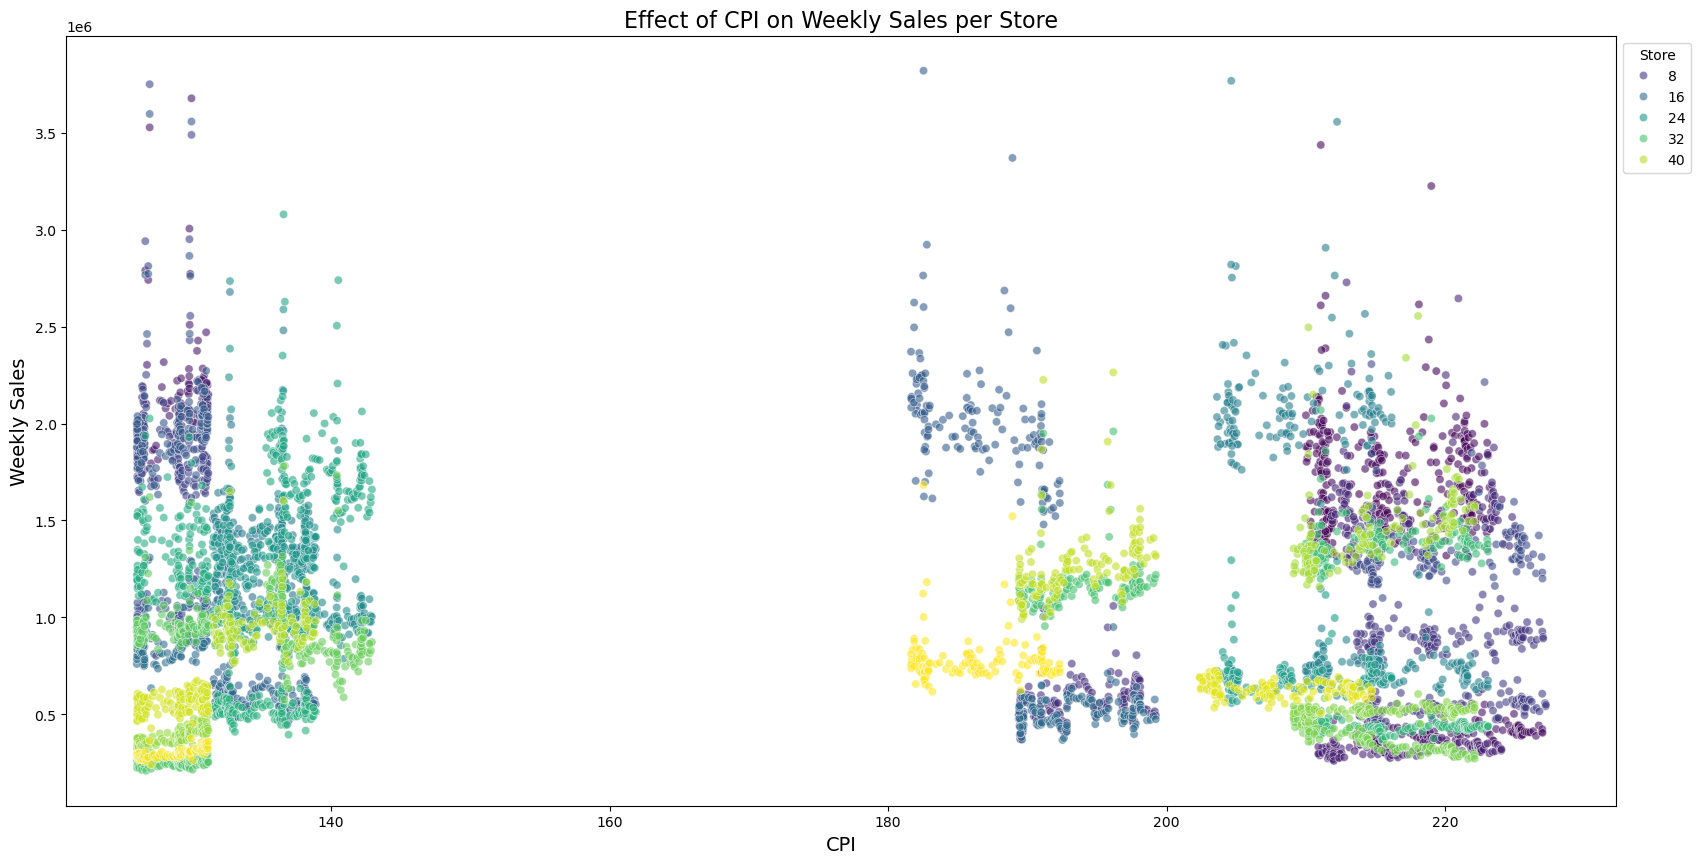

In [17]:
# Effect of CPI on Weekly Sales per Store
plt.figure(figsize=(20, 10))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=data, hue='Store', palette='viridis', alpha=0.6)

plt.title('Effect of CPI on Weekly Sales per Store', fontsize=16)
plt.xlabel('CPI', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.legend(title='Store', bbox_to_anchor=(1,1), loc='upper left')
plt.show()

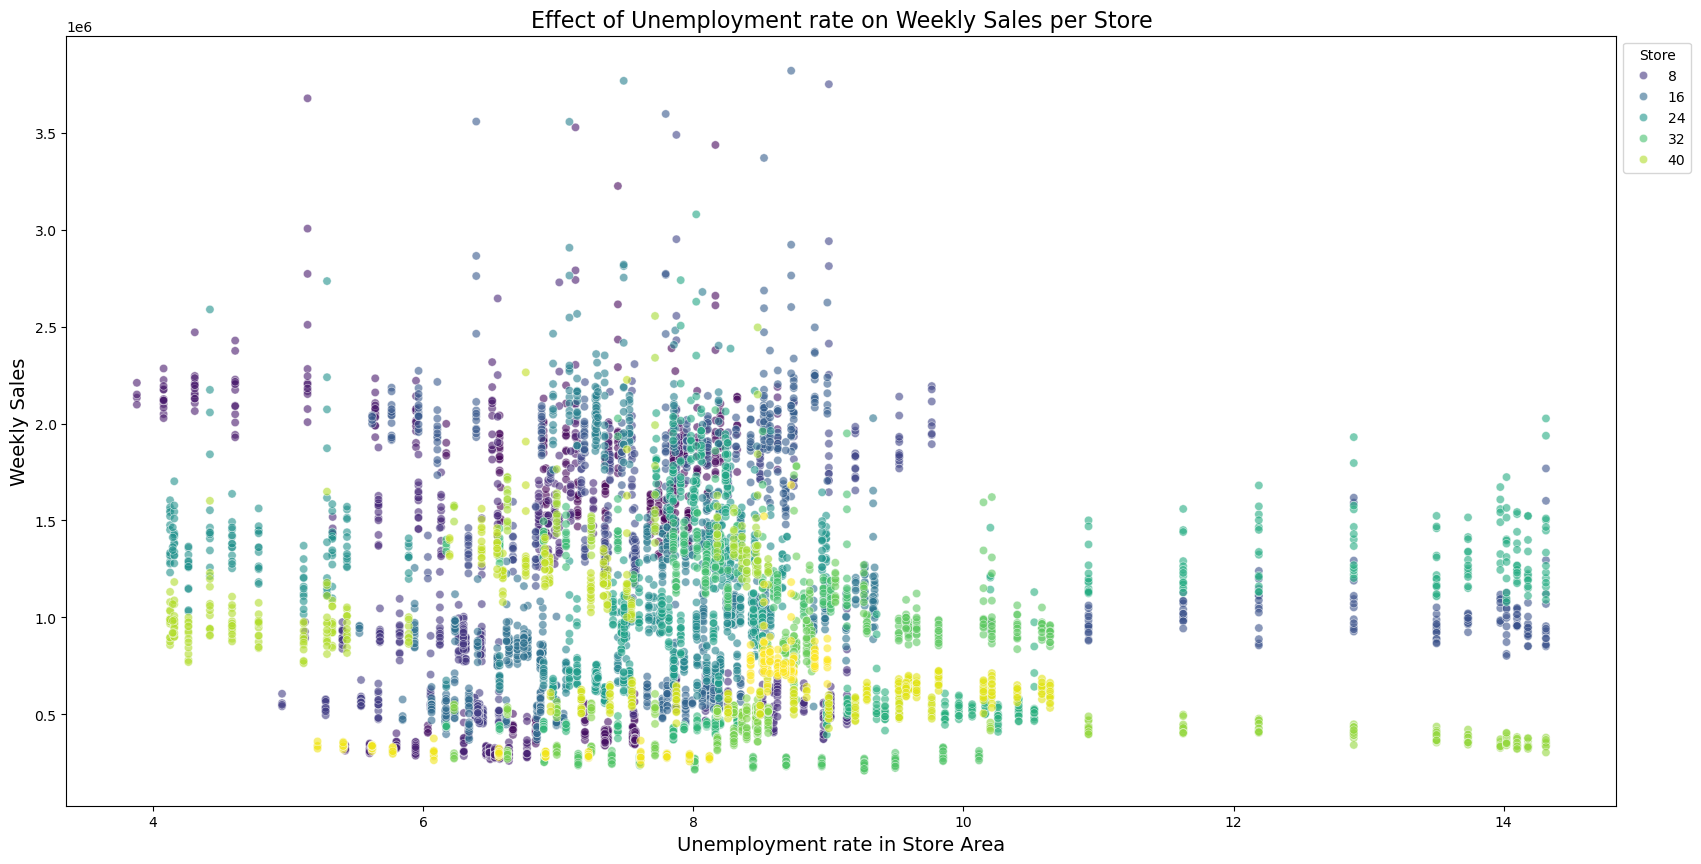

In [18]:
# Effect of Unemployment on Weekly Sales per Store
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=data, hue='Store', palette='viridis', alpha=0.6)

plt.title('Effect of Unemployment rate on Weekly Sales per Store', fontsize=16)
plt.xlabel('Unemployment rate in Store Area', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.legend(title='Store', bbox_to_anchor=(1,1), loc='upper left')
plt.show()

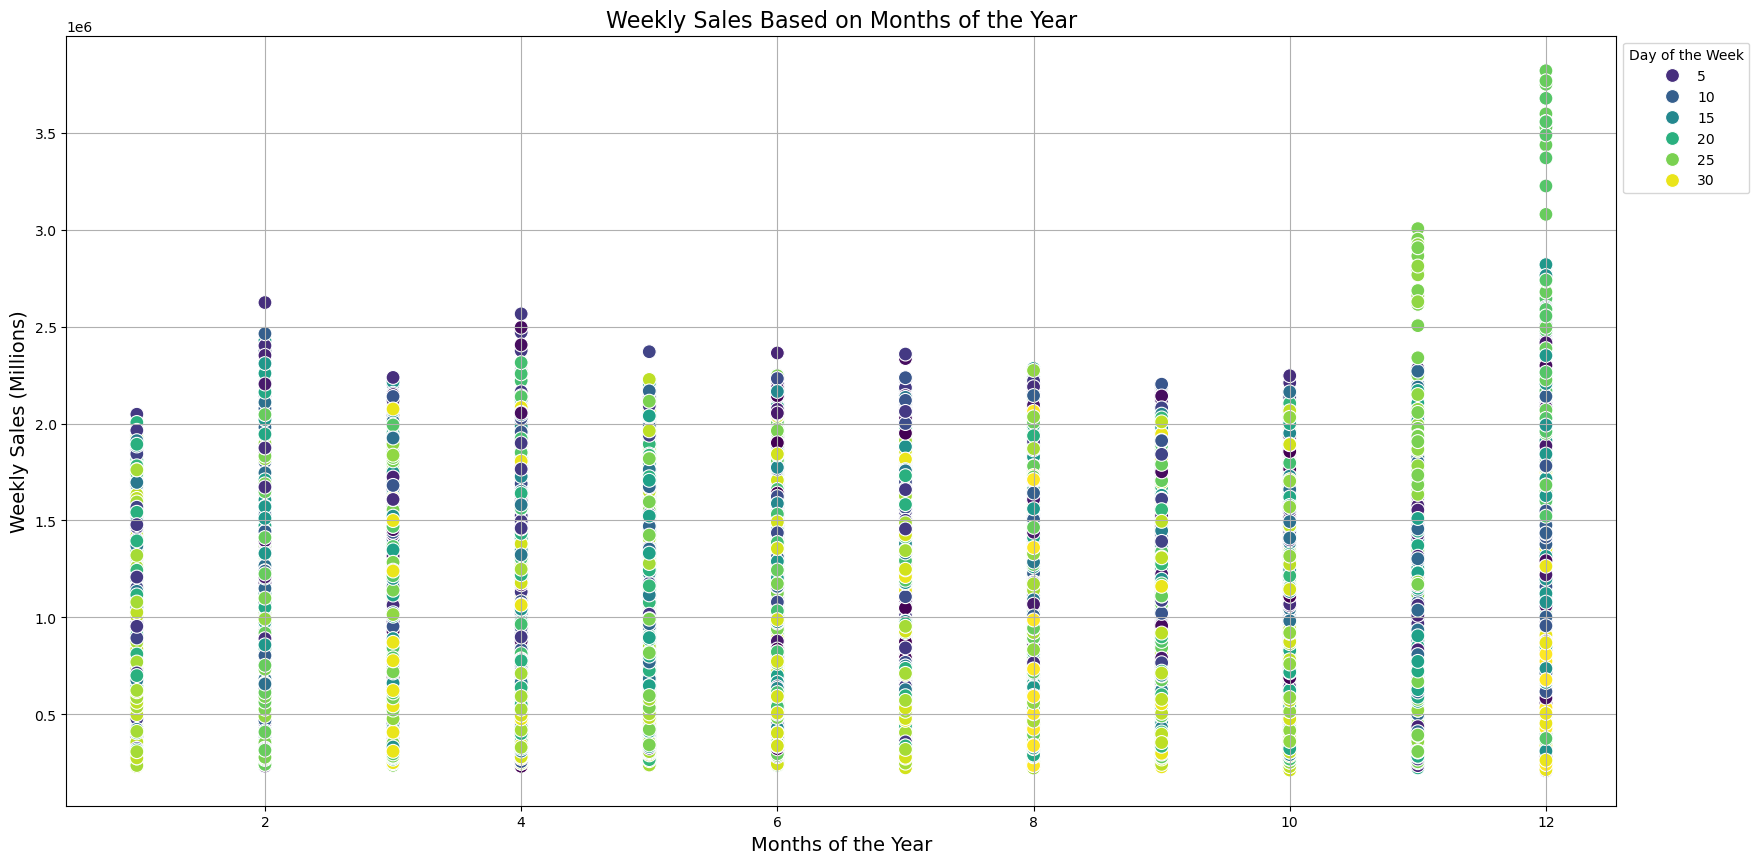

In [19]:
# Weekly Sales Based on Months of the Year
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Month', y='Weekly_Sales', data=data, hue='Day', palette='viridis', s=100)

plt.title('Weekly Sales Based on Months of the Year', fontsize=16)
plt.xlabel('Months of the Year', fontsize=14)
plt.ylabel('Weekly Sales (Millions)', fontsize=14)
plt.legend(title='Day of the Week', bbox_to_anchor=(1,1), loc='upper left')
plt.grid(True)
plt.show()

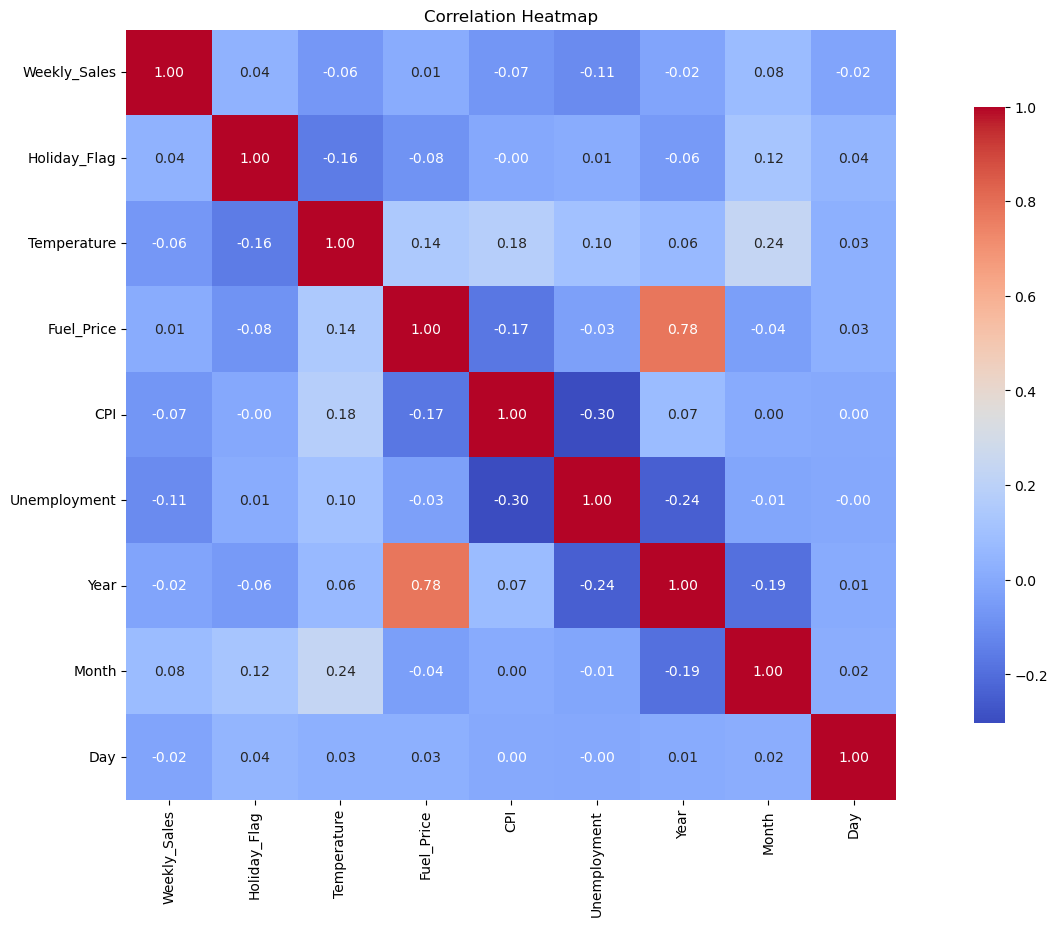

In [20]:
# Heatmap
selected_columns = ['Weekly_Sales','Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day']
data_selected = data[selected_columns]

plt.figure(figsize=(20, 10))
correlation_matrix = data_selected.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

# Preprocessing

In [21]:
# Splitting the dataset into Features and Target
X = data.iloc[:, [0,3,4,5,6,7,8,9,10]]
y = data['Weekly_Sales']

In [22]:
# Splitting data for Training
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

# Linear Regression

In [23]:
# Initializing Linear Regression model
LinearReg = LinearRegression()
LinearReg.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred_LinearReg = LinearReg.predict(X_test)
print(f'y_pred: \n{pd.DataFrame(y_pred_LinearReg)}')

y_pred: 
                 0
0     1.160664e+06
1     1.090997e+06
2     1.299941e+06
3     1.196358e+06
4     6.946352e+05
...            ...
1282  1.208209e+06
1283  6.170610e+05
1284  6.700118e+05
1285  1.253090e+06
1286  1.273923e+06

[1287 rows x 1 columns]


In [25]:
# Analysis of the Linear Regression Model
print(f'MAE: {mean_absolute_error(y_test, y_pred_LinearReg)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_LinearReg))}')
print(f'r2: {r2_score(y_test, y_pred_LinearReg)}')

MAE: 432598.3045496046
RMSE: 521597.61442135595
r2: 0.1554859026152028


# Random Forest Regressor

In [26]:
# Initializing Random Forest Regressior model
RandForest = RandomForestRegressor()
RandForest.fit(X_train, y_train)

RandomForestRegressor()

In [27]:
# Predicted values
y_pred_RandForest = RandForest.predict(X_test)
print(f'y_pred: \n{pd.DataFrame(y_pred_RandForest)}')

y_pred: 
                 0
0     1.156810e+06
1     1.363975e+06
2     1.757041e+06
3     1.001873e+06
4     4.565607e+05
...            ...
1282  1.517527e+06
1283  7.724336e+05
1284  7.278584e+05
1285  2.010544e+06
1286  8.009324e+05

[1287 rows x 1 columns]


In [28]:
# Analysis of the Linear Regression Model
print(f'MAE: {mean_absolute_error(y_test, y_pred_RandForest)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_RandForest))}')
print(f'r2: {r2_score(y_test, y_pred_RandForest)}')

MAE: 57363.905312898205
RMSE: 113773.07946567154
r2: 0.9598195554800883


# XGBoost

In [29]:
# Initializing XGBoost model
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
y_pred_xgb = xgb.predict(X_test)
print(f'y_pred: \n{pd.DataFrame(y_pred_xgb)}')

y_pred: 
                 0
0     1.116868e+06
1     1.365476e+06
2     1.810950e+06
3     9.924386e+05
4     4.371897e+05
...            ...
1282  1.516626e+06
1283  8.863961e+05
1284  7.801907e+05
1285  2.006341e+06
1286  8.131353e+05

[1287 rows x 1 columns]


In [31]:
# Analysis of the XGBoost Model
print(f'MAE: {mean_absolute_error(y_test, y_pred_xgb)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb))}')
print(f'r2: {r2_score(y_test, y_pred_xgb)}')

MAE: 49296.78487601374
RMSE: 86031.12934755148
r2: 0.9770254529057195


# Analyzing the results of the 3 Models

In [32]:
MAE = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MAE': [mean_absolute_error(y_test, y_pred_LinearReg),
             mean_absolute_error(y_test, y_pred_RandForest), 
             mean_absolute_error(y_test, y_pred_xgb)]
})

MAE

,Model,MAE
0,Linear Regression,432598.304550
1,Random Forest,57363.905313
2,XGBoost,49296.784876


XGBoost has the lowest MAE at 49,296.78, indicating that it makes predictions that are, on average, about $49,297 off from the actual weekly sales. This suggests that XGBoost is the most accurate model among the three for this dataset.

Random Forest follows closely with an MAE of 57,262.48, indicating that its predictions are, on average, off by about $57,262. This is also quite good but slightly less accurate than XGBoost.

Linear Regression has a significantly higher MAE of 432,598.30, indicating that its predictions are, on average, off by about $432,598. This suggests that Linear Regression is not capturing the underlying patterns in the data as effectively as the other two models.

In [33]:
RMSE = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_LinearReg)),
             np.sqrt(mean_squared_error(y_test, y_pred_RandForest)), 
             np.sqrt(mean_squared_error(y_test, y_pred_xgb))]
})

RMSE

,Model,RMSE
0,Linear Regression,521597.614421
1,Random Forest,113773.079466
2,XGBoost,86031.129348


XGBoost has the lowest RMSE at 86,031.13, making it the most accurate model among the three for this dataset. 

Random Forest follows with an RMSE of 113,905.08, which is also a good performance but not as accurate as XGBoost.

Linear Regression has a significantly higher RMSE of 521,597.61, indicating that the model is not capturing the underlying patterns in the data effectively.

In [34]:
r2 = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'r2': [r2_score(y_test, y_pred_LinearReg),
           r2_score(y_test, y_pred_RandForest), 
           r2_score(y_test, y_pred_xgb)]
})

r2

,Model,r2
0,Linear Regression,0.155486
1,Random Forest,0.959820
2,XGBoost,0.977025


XGBoost has the highest r2 score at 0.9770, indicating that approximately 97.70% of the variance in the dependent variable (weekly sales) can be explained by the independent variables in the model. This suggests that XGBoost is very effective at capturing the underlying patterns in the data.

Random Forest also performs well with an r2 score of 0.9597, meaning it explains about 95.97% of the variance. This is also a strong performance, indicating that the model is capturing the relationships in the data effectively.

Linear Regression, on the other hand, has a very low r2 score of 0.1555. This indicates that the linear model is not capturing the underlying patterns in the data effectively and is likely underfitting.

# Predictions for the next 12 weeks

In [35]:
# Assuming last date in the dataset to be last row of given data
last_date = pd.to_datetime(data['Date'].iloc[-1])

In [36]:
# Creating 12 future dates
future_dates = [last_date + dt.timedelta(weeks=i) for i in range(1, 13)]

In [37]:
# Creating a DataFrame for future predictions
future_data = pd.DataFrame({
    'Date': future_dates,
    'Store': [1] * 12,
    'Holiday_Flag': [0] * 12,
    'Temperature': [data['Temperature'].mean()] * 12,
    'Fuel_Price': [data['Fuel_Price'].mean()] * 12,
    'CPI': [data['CPI'].mean()] * 12,
    'Unemployment': [data['Unemployment'].mean()] * 12,
})

In [38]:
# Extracting Year, Month, Day from future_dates
future_data['Year'] = future_data['Date'].dt.year
future_data['Month'] = future_data['Date'].dt.month
future_data['Day'] = future_data['Date'].dt.day

In [39]:
# Features for prediction (Features we used to Train - y)
X_future = future_data[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day']]

In [40]:
# Predictions of all the Models

LinearReg_future = LinearReg.predict(X_future)
RandForest_future = RandForest.predict(X_future)
xgb_future = xgb.predict(X_future)

future_data['Predicted_Sales_LinearReg'] = LinearReg_future
future_data['Predicted_Sales_RandForest'] = RandForest_future
future_data['Predicted_Sales_xgb'] = xgb_future

future_data.iloc[:, [0,10,11,12]]

,Date,Predicted_Sales_LinearReg,Predicted_Sales_RandForest,Predicted_Sales_xgb
0,2012-11-02,1.441042e+06,1.972025e+06,1954807.375
1,2012-11-09,1.429659e+06,1.964263e+06,1965319.250
2,2012-11-16,1.418275e+06,1.955325e+06,2106474.000
3,2012-11-23,1.406892e+06,2.651709e+06,2473599.250
4,2012-11-30,1.395509e+06,1.890587e+06,1863367.375
5,2012-12-07,1.447459e+06,2.321962e+06,2285445.000
6,2012-12-14,1.436076e+06,2.424779e+06,2525251.000
7,2012-12-21,1.424693e+06,2.645382e+06,3045179.250
8,2012-12-28,1.413310e+06,2.860355e+06,2492878.500
9,2013-01-04,1.269377e+06,1.777560e+06,1673689.875


In [41]:
# Melting data for easier plotting
melted_data = future_data.melt(id_vars='Date', 
                                 value_vars=['Predicted_Sales_LinearReg', 'Predicted_Sales_RandForest', 'Predicted_Sales_xgb'],
                                 var_name='Model', 
                                 value_name='Predicted_Sales')

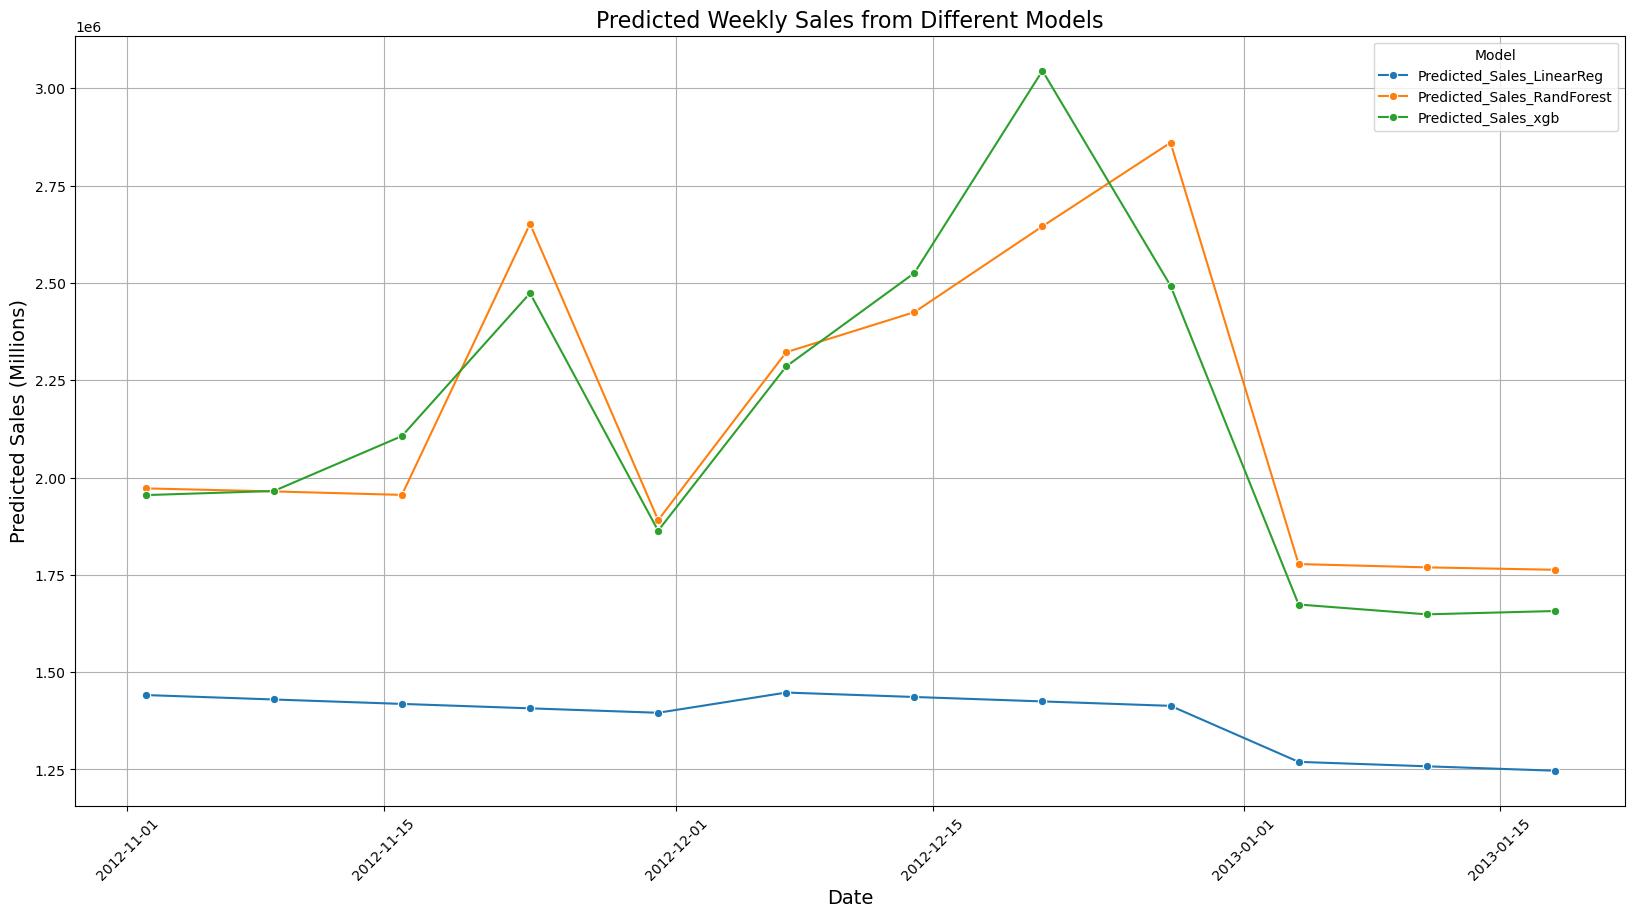

In [42]:
# Plotting the Predicted results
plt.figure(figsize=(20, 10))
sns.lineplot(data=melted_data, x='Date', y='Predicted_Sales', hue='Model', marker='o')

plt.title('Predicted Weekly Sales from Different Models', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Predicted Sales (Millions)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.grid(True)

plt.show()